# Credit Card Lead Prediction with SMOTE, XGBoost with Grid Search 
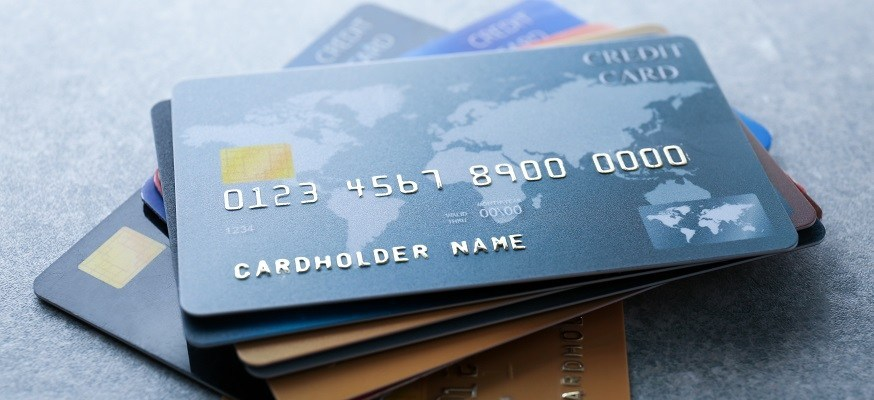

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Reaidng the Train Dataset

In [2]:
df = pd.read_csv('train_s3TEQDk.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Reading the Test Dataset

In [3]:
df_test = pd.read_csv("test_mSzZ8RL.csv")
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Data Cleaning

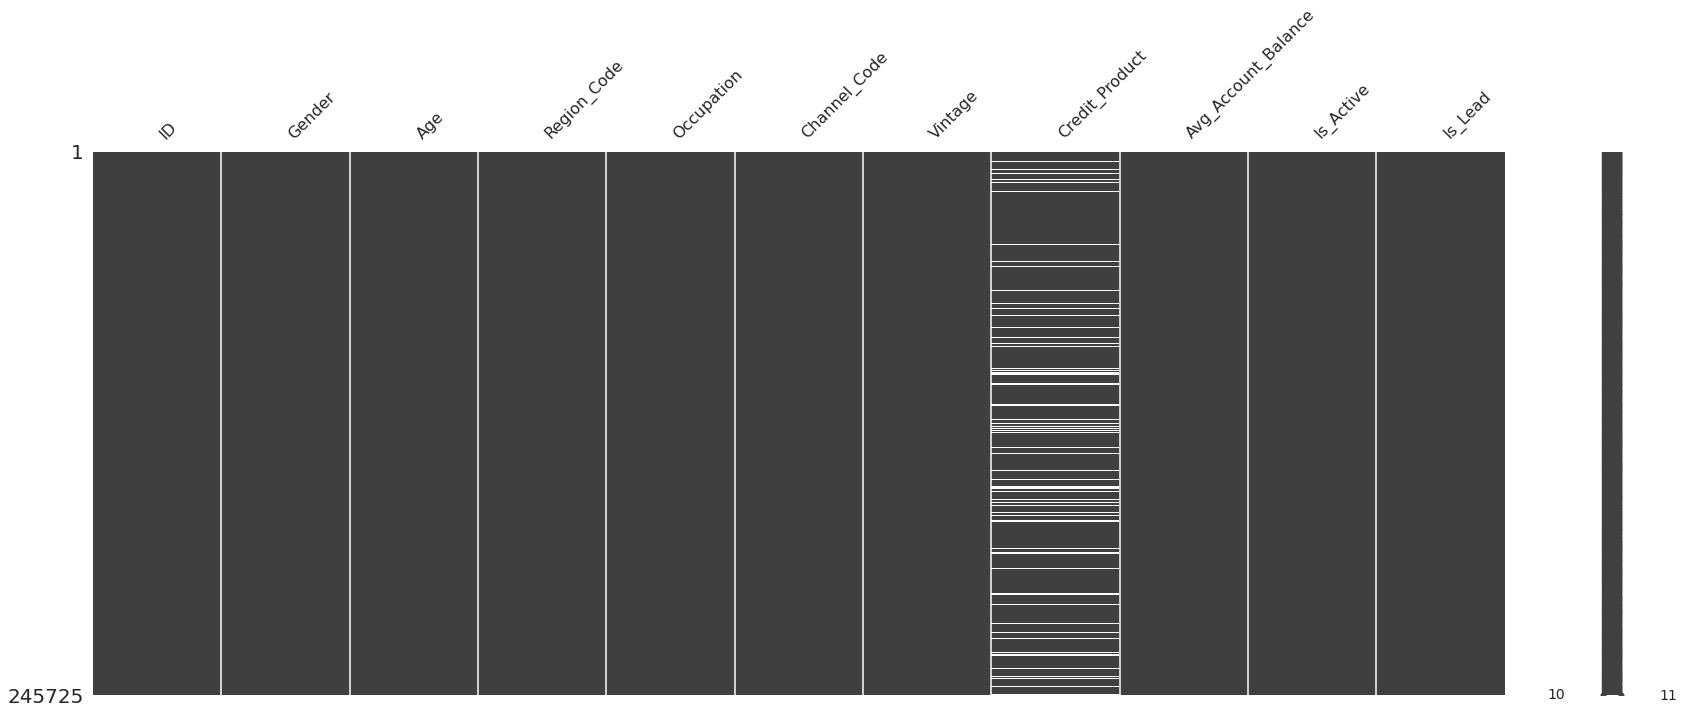

In [4]:
import missingno as m
m.matrix(df)

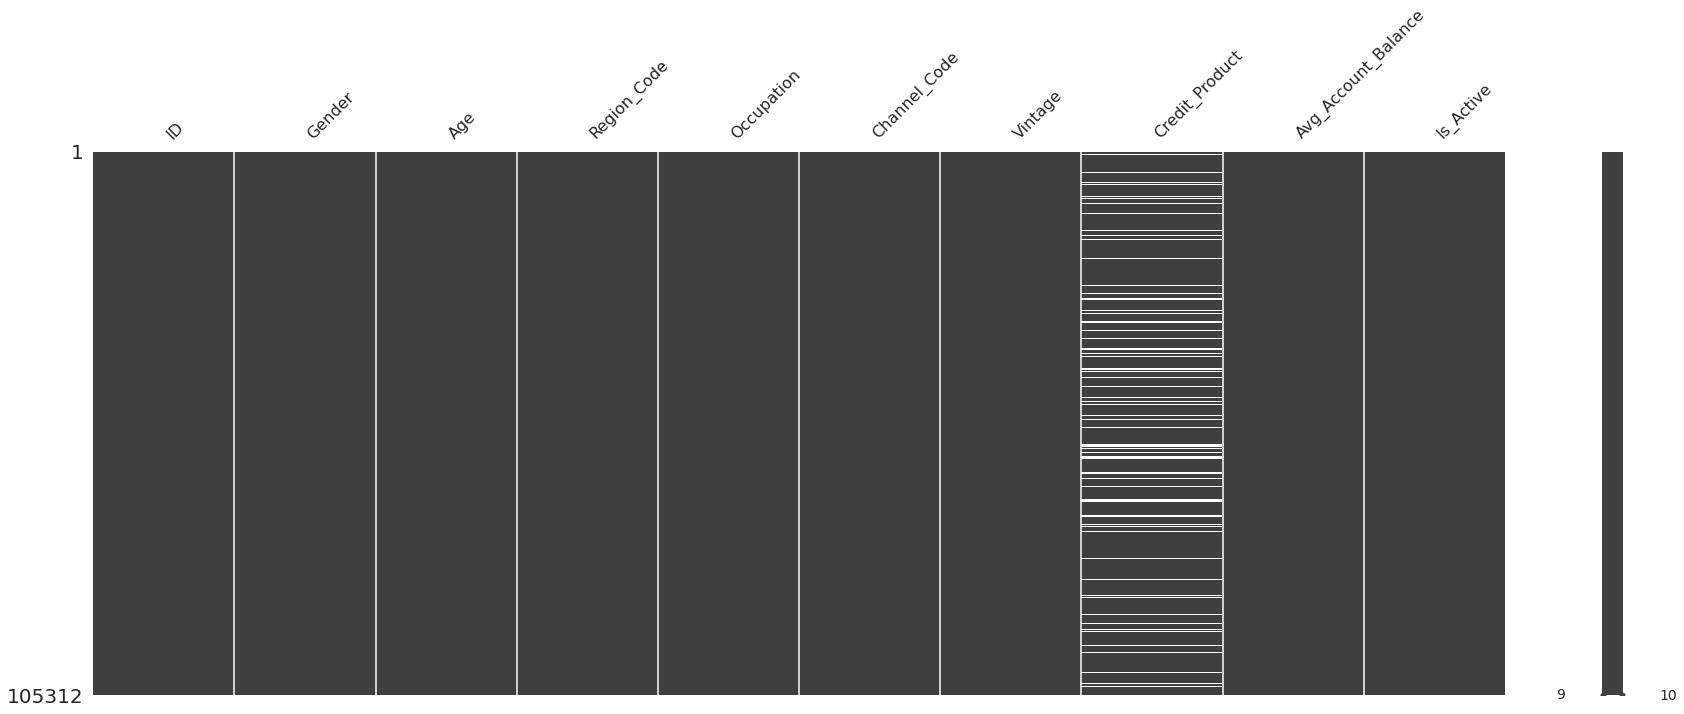

In [5]:
import missingno as m
m.matrix(df_test)

# Dealing with Missing Values of  Credit_Product column of both train and test dataset


In [6]:
df.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

In [7]:
df_test.Credit_Product.unique()

array(['Yes', nan, 'No'], dtype=object)

In [8]:
df['Credit_Product'] = df['Credit_Product'].replace(np.nan,'Not_Specified')

In [9]:
df_test['Credit_Product'] = df_test['Credit_Product'].replace(np.nan,'Not_Specified')

In [10]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Not_Specified,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Dropping the ID column from both train and test Dataset

In [12]:
df = df.drop(columns=['ID'])

In [13]:
df_test = df_test.drop(columns=['ID'])

# Labeling the caregorical values with Label Encoder for both Train and Test Dataset 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Region_Code'] = le.fit_transform(df['Region_Code'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Channel_Code'] = le.fit_transform(df['Channel_Code'])
df['Credit_Product'] = le.fit_transform(df['Credit_Product'])
df['Is_Active'] = le.fit_transform(df['Is_Active'])


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Region_Code'] = le.fit_transform(df_test['Region_Code'])
df_test['Occupation'] = le.fit_transform(df_test['Occupation'])
df_test['Channel_Code'] = le.fit_transform(df_test['Channel_Code'])
df_test['Credit_Product'] = le.fit_transform(df_test['Credit_Product'])
df_test['Is_Active'] = le.fit_transform(df_test['Is_Active'])

In [16]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [17]:
df_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,2,742366,0
1,1,43,18,1,1,49,1,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0


# X and y Split

In [18]:
X = df.drop('Is_Lead', axis = 1)
y = df.Is_Lead

In [19]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0


# Number of Target Variabe column before Oversampling

In [20]:
y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

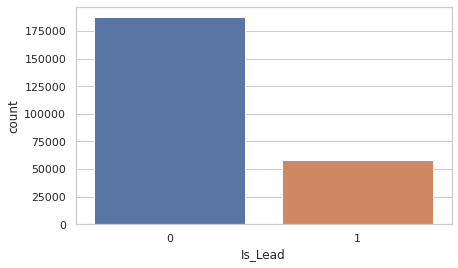

In [21]:
sns.countplot(x = y, data = df)

# SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)


In [23]:
X_smote.shape, y_smote.shape

((374874, 9), (374874,))

# After Oversampling 

In [27]:
print("Number of label 1: ",(sum(y_smote==1)))
print("Number of label 0: ",format(sum(y_smote==0)))

Number of label 1:  187437
Number of label 0:  187437


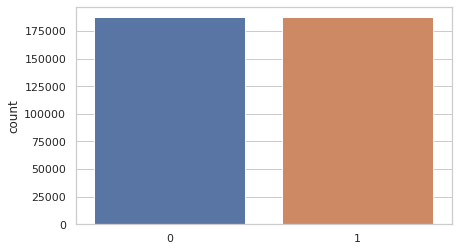

In [28]:
sns.countplot(x = y_smote, data = df)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

# Setting the Parameters 

In [30]:
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}


# Calling XGBOOST classifier

In [31]:
xgb = xgb.XGBClassifier(
    random_state=42, verbosity = 0
)


# Grid Search

In [32]:
xgb = GridSearchCV(
    xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

# Fitting the Dataset into the Model

In [33]:
xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 25, 50

# Predict for the X_test Dataset

In [34]:
y_pred = xgb.predict(X_test)

In [35]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

# Classification Report

In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     40970
           1       0.83      0.91      0.87     34005

    accuracy                           0.87     74975
   macro avg       0.87      0.87      0.87     74975
weighted avg       0.88      0.87      0.87     74975



# The Best Parameter 

In [58]:
print(f'Best parameters : {xgb.best_params_}')

Best parameters : {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


# ROC_AUC Score


In [42]:
from sklearn.metrics import roc_auc_score
print("The ROC_AOC Score : ",roc_auc_score(y_pred, y_test))

The ROC_AOC Score :  0.8747964403287907


# Converting Test dataset into array


In [43]:
df_testt = df_test.values

In [44]:
df_testt

array([[      1,      29,       4, ...,       2,  742366,       0],
       [      1,      43,      18, ...,       1,  925537,       0],
       [      1,      31,      20, ...,       0,  215949,       0],
       ...,
       [      1,      35,       4, ...,       0, 1703727,       0],
       [      1,      53,       4, ...,       0,  737178,       1],
       [      1,      27,       6, ...,       0,  591565,       0]])

# Predicting for the Test Dataset

In [46]:
y_pred_new = xgb.predict(df_testt)

In [47]:
y_pred_new

array([0, 1, 0, ..., 0, 0, 0])

# Making Submission Dataframe

In [48]:
submission = pd.DataFrame()

Reading the test dataset again because we need the ID column for Submission and I have dropped ID column previously in order to run it in XGBOOST Classifier 

In [49]:
dff = pd.read_csv("test_mSzZ8RL.csv")
dff.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Taking the ID column and New Predicted data in Submission Dataset

In [50]:
submission['ID'] = dff['ID']

In [51]:
submission['Is_Lead'] = y_pred_new

In [52]:
submission.shape

(105312, 2)

# Final Submission Dataset

In [53]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


# Saving it into a CSV file

In [54]:
submission.to_csv("Submission.csv")

# This is my required Submission.csv file